# EDA Case Study: Loan Defaulters

## STEP 1: INSPECTING THE DATAFRAME

In [1]:
#loading all packages and libraries

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the files application.csv
app1=pd.read_csv('C:/Users/dhavalpc/Downloads/application_data.csv')
app1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#shape of dataset application.csv
app1.shape

(307511, 122)

In [5]:
#checking the datatypes
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#describing the data
app1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
#checking for null counts columnwise
app1.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#finding the percentage of null values

null_percent = round(100 * (app1.isnull().sum()/len(app1.index)),2)
null_percent

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [10]:
# Dropping all the columns above 40% null values
drop_columns = ['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','EMERGENCYSTATE_MODE',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE',
'LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','YEARS_BUILD_MEDI','LANDAREA_MEDI',
'BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE']

app1.drop(columns=drop_columns, axis=1,inplace=True)
app1.shape

(307511, 73)

Initially we had 122 columns.After removing the columns which have null values above 40% we have 73 columns

In [11]:
#checking for null percent after dropping
null_percent_after_drop = round(100 * (app1.isnull().sum()/len(app1.index)),2)
null_percent_after_drop

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

We see that the OCCUPATION_TYPE column is a categorical variable and has around 31% null values.However this column is crucial in determining
whether a person will be eligible for loan depending upon the type of occupation.

Hence we cannot delete these rows completely or impute it with mode values.We can categorize these null values as NOT_KNOWN.

In [13]:
app1.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [14]:
#columns with less percentage of missing values, say less than 30%
percent=round(100*(app1.isnull().sum()/(len(app1.index))))
low_val=list(percent[(percent>0) & (percent<=30)].index)
low_val

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [15]:
#Creating a temp dataframe to store the above columns
temp_low = app1.loc[:,low_val]
temp_low.head()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
temp_low.describe().T

,count,mean,std,min,25%,50%,75%,max
EXT_SOURCE_3,246546.0,0.510853,0.194844,0.000527,0.37065,0.535276,0.669057,0.89601
AMT_REQ_CREDIT_BUREAU_HOUR,265992.0,0.006402,0.083849,0.000000,0.00000,0.000000,0.000000,4.00000
AMT_REQ_CREDIT_BUREAU_DAY,265992.0,0.007000,0.110757,0.000000,0.00000,0.000000,0.000000,9.00000
AMT_REQ_CREDIT_BUREAU_WEEK,265992.0,0.034362,0.204685,0.000000,0.00000,0.000000,0.000000,8.00000
AMT_REQ_CREDIT_BUREAU_MON,265992.0,0.267395,0.916002,0.000000,0.00000,0.000000,0.000000,27.00000
AMT_REQ_CREDIT_BUREAU_QRT,265992.0,0.265474,0.794056,0.000000,0.00000,0.000000,0.000000,261.00000
AMT_REQ_CREDIT_BUREAU_YEAR,265992.0,1.899974,1.869295,0.000000,0.00000,1.000000,3.000000,25.00000


In [17]:
app1.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

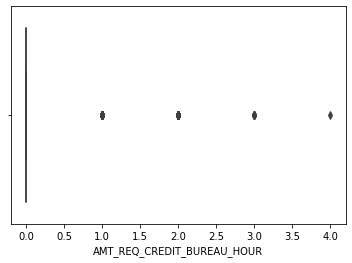

In [18]:
sns.boxplot(app1['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.show()

In [19]:
#Creating boxplots to check whether there are outliers

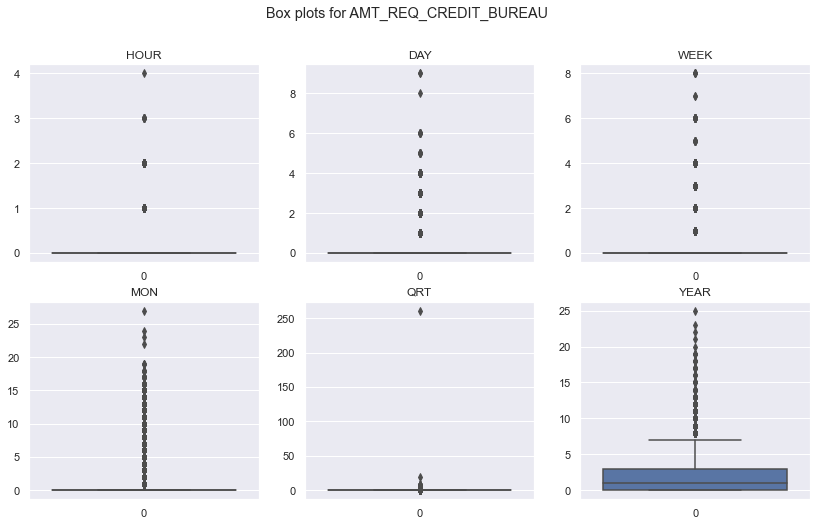

In [20]:
sns.set()

fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle('Box plots for AMT_REQ_CREDIT_BUREAU')

sns.boxplot(ax=axes[0, 0], data=app1['AMT_REQ_CREDIT_BUREAU_HOUR'])
axes[0, 0].set_title("HOUR")
sns.boxplot(ax=axes[0, 1], data=app1['AMT_REQ_CREDIT_BUREAU_DAY'])
axes[0, 1].set_title("DAY")
sns.boxplot(ax=axes[0, 2], data=app1['AMT_REQ_CREDIT_BUREAU_WEEK'])
axes[0, 2].set_title("WEEK")
sns.boxplot(ax=axes[1, 0], data=app1['AMT_REQ_CREDIT_BUREAU_MON'])
axes[1, 0].set_title("MON")
sns.boxplot(ax=axes[1, 1], data=app1['AMT_REQ_CREDIT_BUREAU_QRT'])
axes[1, 1].set_title("QRT")
sns.boxplot(ax=axes[1, 2], data=app1['AMT_REQ_CREDIT_BUREAU_YEAR'])
axes[1, 2].set_title("YEAR")

plt.show()

As we can see from the box plots that all the variables have outliers.
Hence we can impute median values for these variables.

In [21]:
print(app1.AMT_REQ_CREDIT_BUREAU_HOUR.median())
print(app1.AMT_REQ_CREDIT_BUREAU_DAY.median())
print(app1.AMT_REQ_CREDIT_BUREAU_WEEK.median())
print(app1.AMT_REQ_CREDIT_BUREAU_MON.median())
print(app1.AMT_REQ_CREDIT_BUREAU_QRT.median())
print(app1.AMT_REQ_CREDIT_BUREAU_YEAR.median())


0.0
0.0
0.0
0.0
0.0
1.0


In [22]:
# Imputing missing values with median

app1.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app1.AMT_REQ_CREDIT_BUREAU_HOUR.median(), inplace=True)
app1.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app1.AMT_REQ_CREDIT_BUREAU_DAY.median(), inplace=True)
app1.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app1.AMT_REQ_CREDIT_BUREAU_WEEK.median(), inplace=True)
app1.AMT_REQ_CREDIT_BUREAU_MON.fillna(app1.AMT_REQ_CREDIT_BUREAU_MON.median(), inplace=True)
app1.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app1.AMT_REQ_CREDIT_BUREAU_QRT.median(), inplace=True)
app1.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app1.AMT_REQ_CREDIT_BUREAU_YEAR.median(), inplace=True)

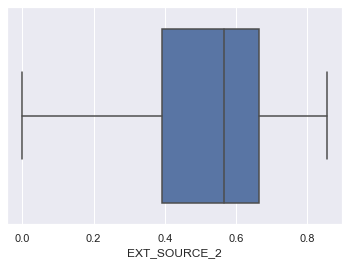

In [24]:
sns.boxplot(app1['EXT_SOURCE_2'])
plt.show()

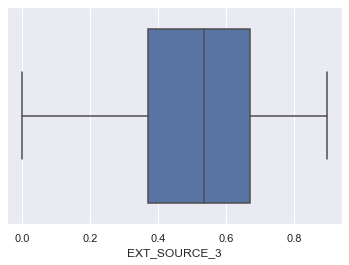

In [25]:
sns.boxplot(app1['EXT_SOURCE_3'])
plt.show()

We can observe that the EXT_SOURCE_2 and EXT_SOURCE_3 variables do not have any outliers.
Hence we can impute the missing values by mean.

In [26]:
app1.EXT_SOURCE_2.mean()

0.5143926741308463

In [27]:
app1.EXT_SOURCE_3.mean()

0.5108529061800121

In [28]:
#REplcing null value of EXT_SOURCE_2 and EXT_SOURCE_3 variables by mean
app1.EXT_SOURCE_2.fillna(app1.EXT_SOURCE_2.mean(), inplace=True)
app1.EXT_SOURCE_3.fillna(app1.EXT_SOURCE_3.mean(), inplace=True)

In [29]:
# Finding percentage of Nan again after imputing
app1_percent = round(100*(app1.isnull().sum()/len(app1.index)),2)
app1_percent

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [30]:
print(app1.dtypes)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

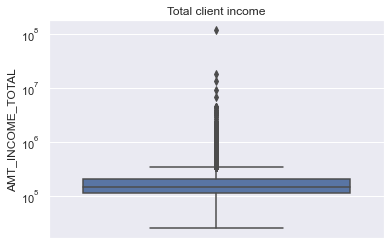

In [31]:
# Checking for outliers for some of the continuous variables according to our understanding
sns.boxplot(y=app1['AMT_INCOME_TOTAL'])
plt.title('Total client income')
plt.yscale('log')
plt.show()

In [32]:
#Removing outliers from AMT_INCOME_TOTAL
a = app1['AMT_INCOME_TOTAL'].quantile(0.99)
app1 = app1[app1['AMT_INCOME_TOTAL']<a]

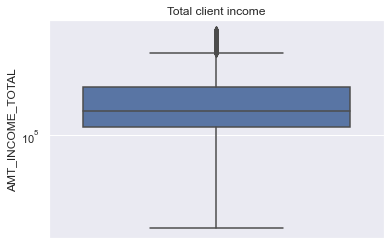

In [33]:
#Checking bxplot after removal of outliers
sns.boxplot(y=app1['AMT_INCOME_TOTAL'])
plt.title('Total client income')
plt.yscale('log')
plt.show()

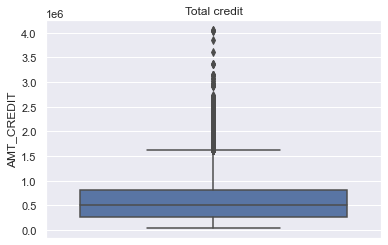

In [34]:
sns.boxplot(y=app1['AMT_CREDIT'])
plt.title('Total credit')
plt.show()

In [35]:
# Removing outliers
b = app1['AMT_CREDIT'].quantile(0.99)
app1 = app1[app1['AMT_CREDIT']<b]

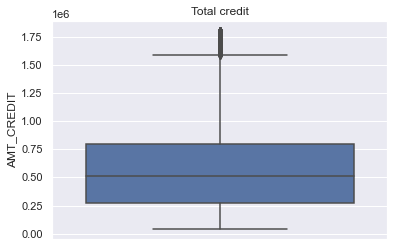

In [36]:
sns.boxplot(y=app1['AMT_CREDIT'])
plt.title('Total credit')
plt.show()

#Now there are less outliers

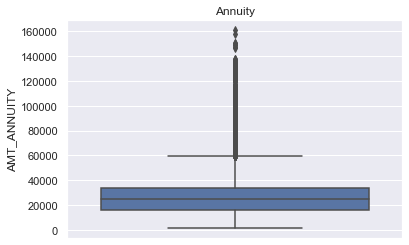

In [37]:
sns.boxplot(y=app1['AMT_ANNUITY'])
plt.title('Annuity')
plt.show()

In [38]:
# Removing outliers
c = app1['AMT_ANNUITY'].quantile(0.99)
app1 = app1[app1['AMT_ANNUITY']<c]

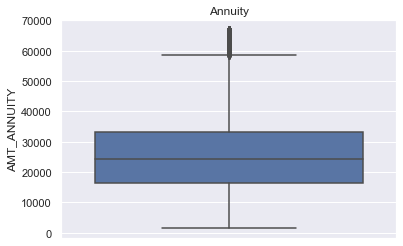

In [39]:
sns.boxplot(y=app1['AMT_ANNUITY'])
plt.title('Annuity')
plt.show()

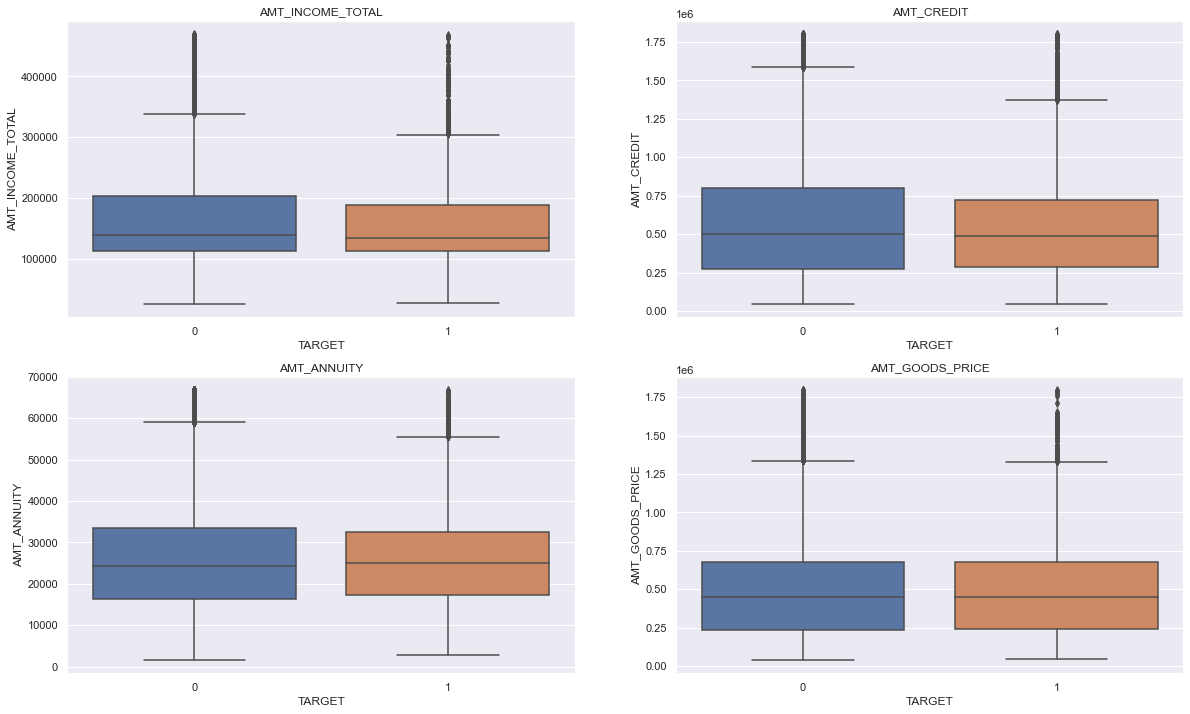

In [40]:
#Comparision of target variables with Box Plot of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE columns

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= app1, ax=axes[0][0])
axes[0][0].set_title('AMT_INCOME_TOTAL')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= app1, ax=axes[0][1])
axes[0][1].set_title('AMT_CREDIT')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= app1, ax=axes[1][0])
axes[1][0].set_title('AMT_ANNUITY')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= app1, ax=axes[1][1])
axes[1][1].set_title('AMT_GOODS_PRICE')

plt.show()

# STEP 2: UNIVARIATE AND BIVARIATE

Target Variables:1 means the client has defaulted/client with payment difficulties and 
                 0 means that they have not/ all other cases.

In [41]:
#Finding the imbalanace count & percentage
app1["TARGET"].value_counts()

0    273271
1     24414
Name: TARGET, dtype: int64

In [42]:
round(100 * app1["TARGET"].mean(),2)

8.2

In [43]:
# Divividing the Dataframe into 2
Target0 = app1[app1["TARGET"]==0]
Target1 = app1[app1["TARGET"]==1]

#### We will do univariate analysis of categorical variables

In [44]:
# storing categorical variable in 'arr'

arr = ['NAME_CONTRACT_TYPE' , 'CODE_GENDER' , 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS','OCCUPATION_TYPE']
list(enumerate(arr))

[(0, 'NAME_CONTRACT_TYPE'),
 (1, 'CODE_GENDER'),
 (2, 'FLAG_OWN_CAR'),
 (3, 'FLAG_OWN_REALTY'),
 (4, 'NAME_INCOME_TYPE'),
 (5, 'NAME_EDUCATION_TYPE'),
 (6, 'NAME_HOUSING_TYPE'),
 (7, 'NAME_FAMILY_STATUS'),
 (8, 'OCCUPATION_TYPE')]

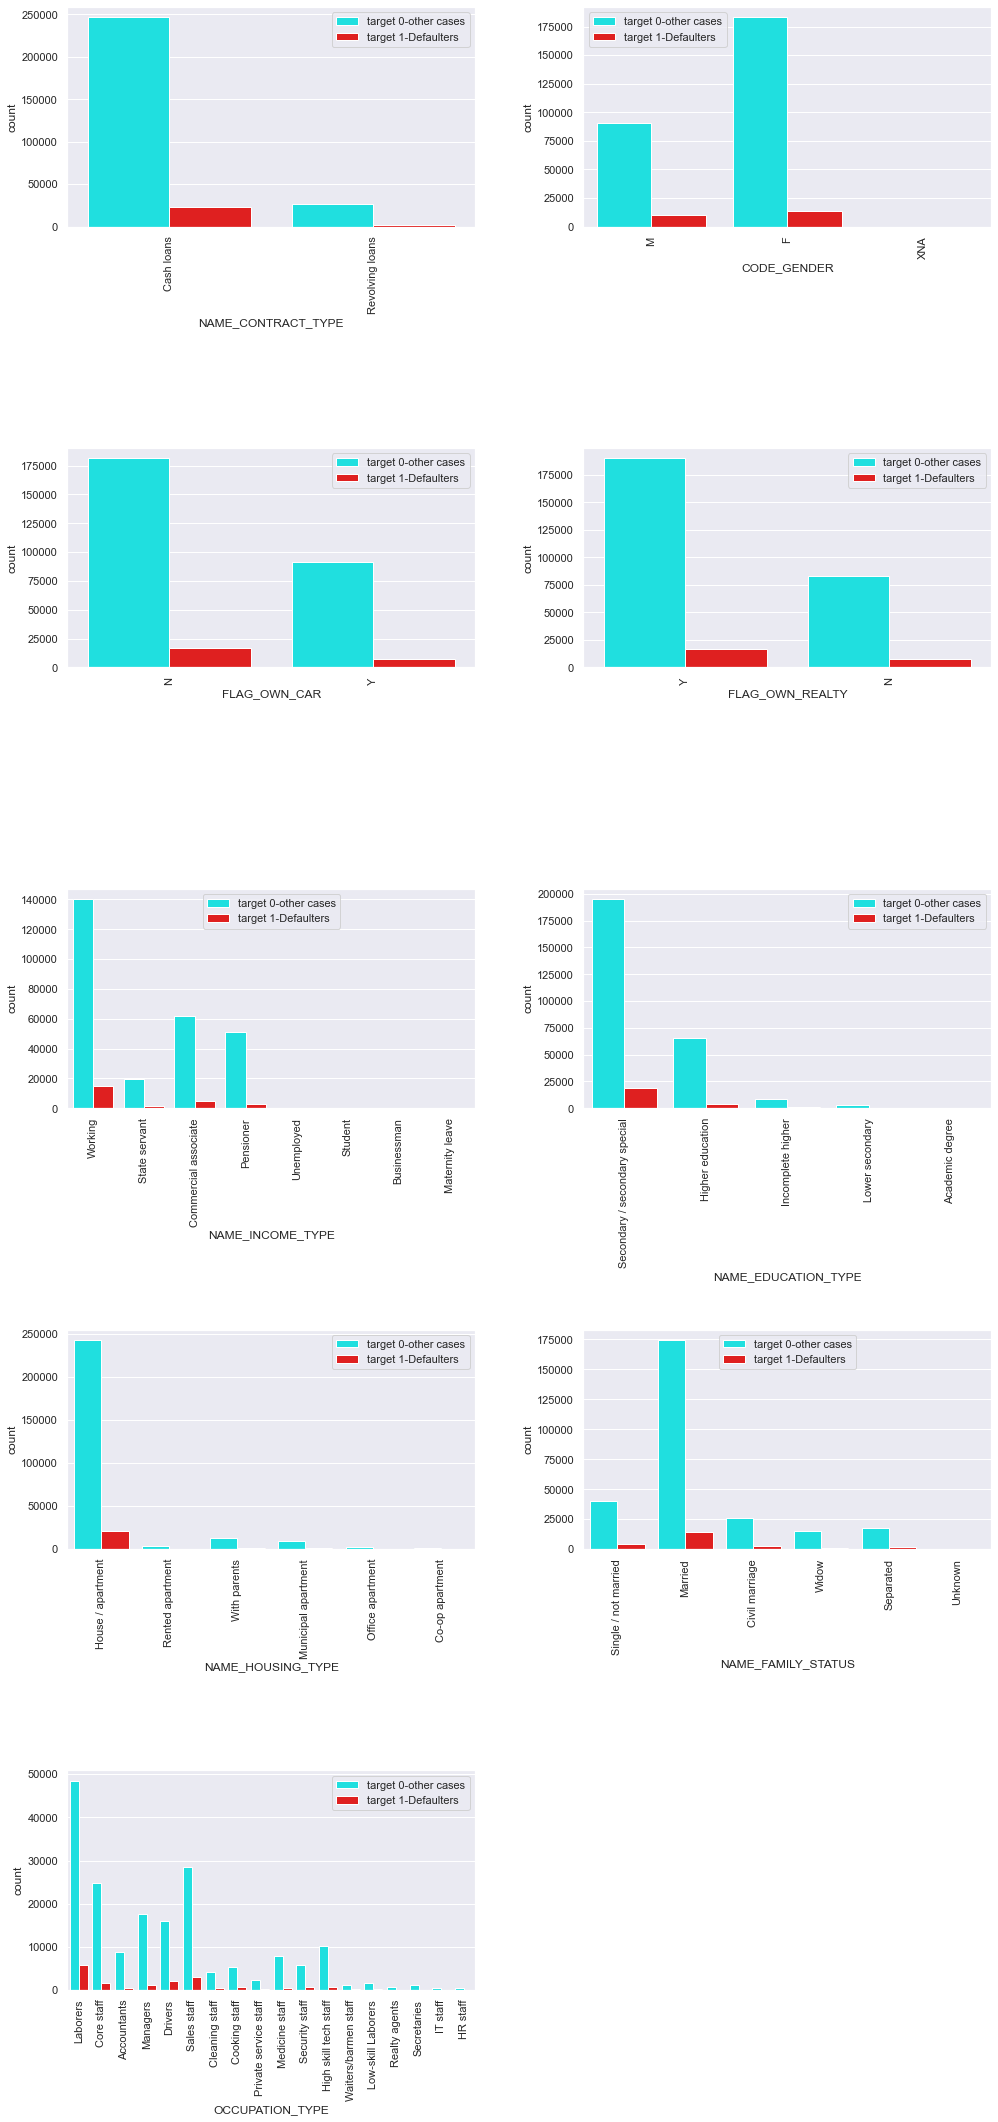

In [45]:
plt.figure(figsize = (15,35))
palette_colors = {0: "cyan", 1: "red"}
for i in enumerate(arr):
    plt.subplot(6,2,i[0]+1)
    plt.tight_layout(pad=4.0)
    sns.countplot(x=i[1],hue='TARGET',data=app1,palette=palette_colors)
    plt.legend(['target 0-other cases','target 1-Defaulters'])
    plt.xticks(rotation=90)
plt.show()

1. NAME_CONRACT_TYPE
Defaulters have opted for cash loan contract where a fixed amount of cash is paid on a set date with the agreed interest rate to the financial institution on a monthly basis.
We can see the there are very less number of defaulters who have opted for Revolving loans.

2. NAME_FAMILY_STATUS
Married people tend to have a higher dicculties in payment

3. CODE_GENDER
The population distribution for female is more towards Target 0

4. OCCUPATION_TYPE
We can see that laborers along with SalesStaff tend to ask/borrow hence they have high ratio in Target-1

#### Continuous Variables:

In [46]:
arr_cont = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_REGISTRATION',
'DAYS_ID_PUBLISH','EXT_SOURCE_2', 'CNT_CHILDREN']

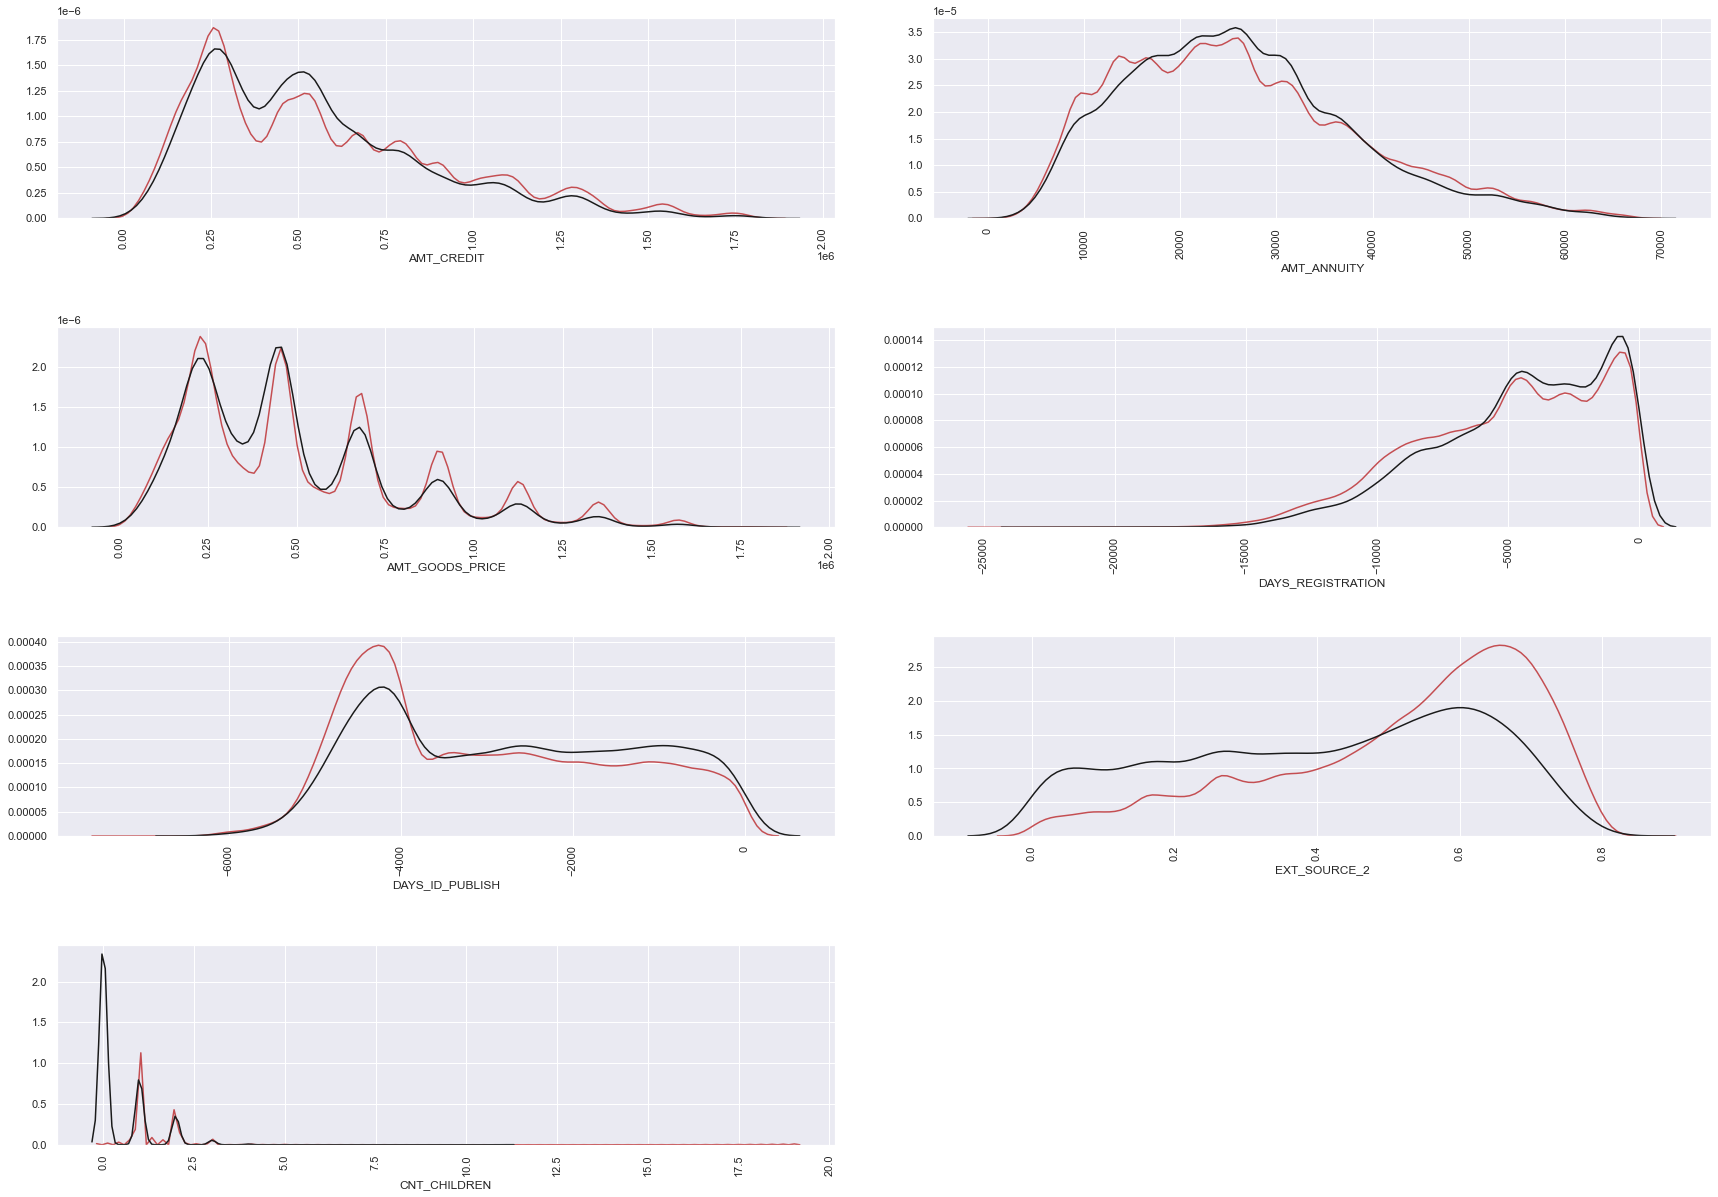

In [47]:
plt.figure(figsize=(25,30))  
try:
    for i in enumerate (arr_cont):
        plt.subplot(7,2,i[0]+1)
        sns.distplot(Target0[i[1]], hist = False , color = 'r')
        sns.distplot(Target1[i[1]], hist = False , color = 'k')
        plt.tight_layout(pad=4.0)
        plt.xticks(rotation = 90)
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(Target0[i[1]], kde_kws={'bw': 1})
    elif str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.distplot(Target1[i[1]], kde_kws={'bw': 1})
    
plt.show()

The variables such as AMT_CREDIT, AMT_ANNUITY,DAYS_REGISTRATION etc follow the same pattern across the TARGET. Further, as the client increases the credit amount, the default rate also increases and the vica-versa.
 
In case of CNT_CHILDREN, the distrubution shows that clients with no children are unable to clear their dues. This provides an interesting insight since it clears the myth that those who have more children usualyy default on their loans. But , here the results are opposite.

### BIVARIATE ANALYSIS

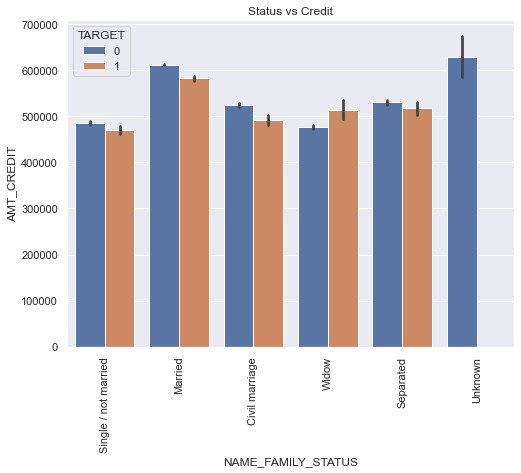

In [48]:
plt.figure(figsize = (8,6))
sns.barplot(x='NAME_FAMILY_STATUS', y="AMT_CREDIT", hue = "TARGET" , data = app1)
plt.title('Status vs Credit')
plt.xticks(rotation = 90)
plt.show()

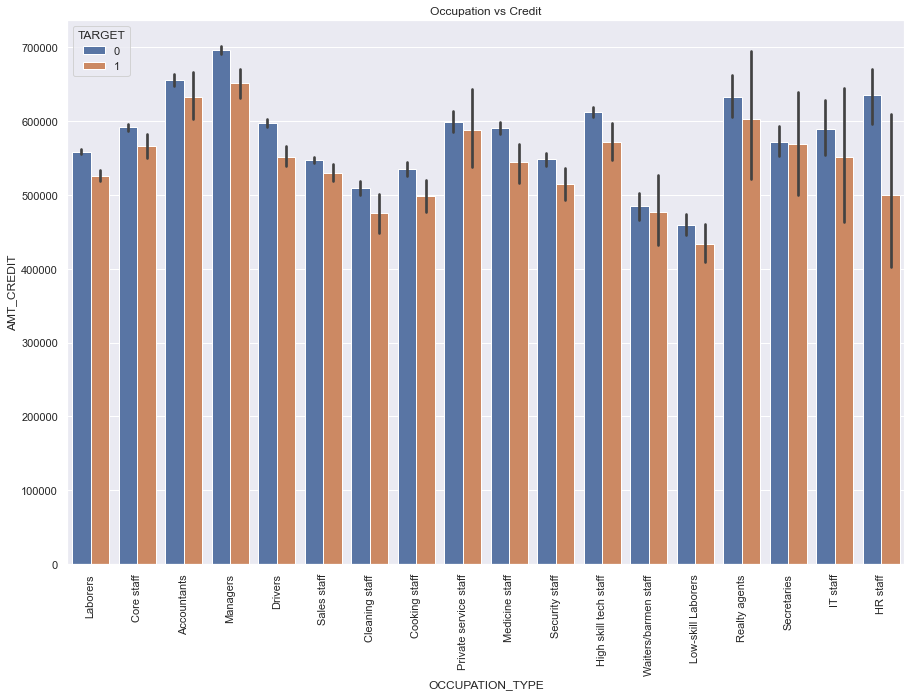

In [49]:
plt.figure(figsize = (15,10))
sns.barplot(x='OCCUPATION_TYPE', y="AMT_CREDIT", hue = "TARGET" , data = app1)
plt.title('Occupation vs Credit')
plt.xticks(rotation = 90)
plt.show()

The above graph illustrates that amongst the occupations, managers  followed by accountants have more credit as compared to others. However, both managers and accountants face problems in paying their loans. Most of the outliers are from IT and HR staff.


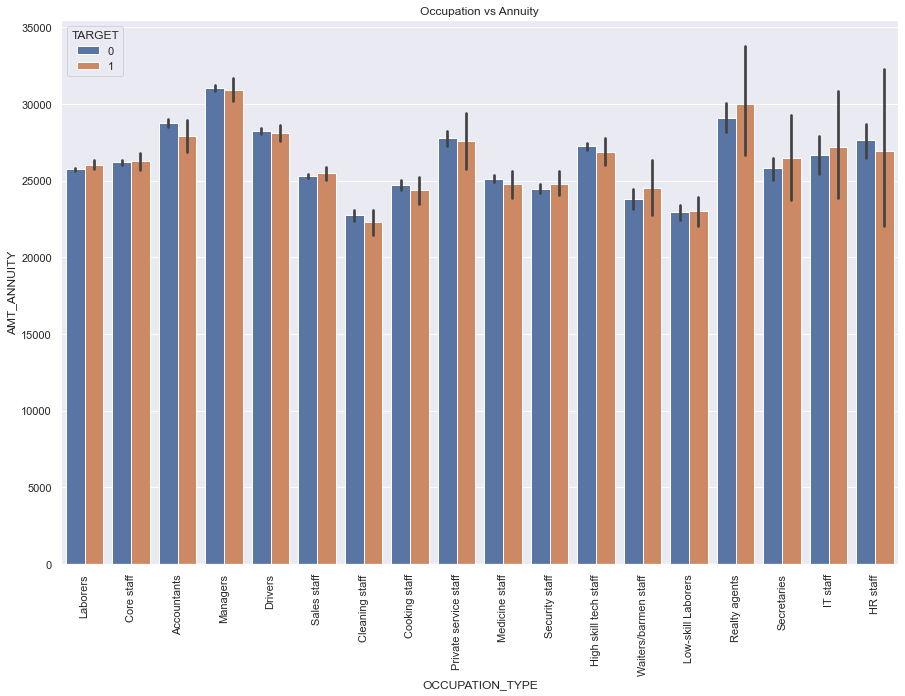

In [50]:
plt.figure(figsize = (15,10))
sns.barplot(x='OCCUPATION_TYPE', y="AMT_ANNUITY", hue = "TARGET" , data = app1)
plt.title('Occupation vs Annuity')
plt.xticks(rotation = 90)
plt.show()

The above graph illustrates that amongst the occupations, managers  followed by HR Staff that paid the annuity amount face problems in clearing their debts. Most of the outliers are from IT and HR staff.  


## CORRELATION

In [51]:
Target0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273271 entries, 1 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   273271 non-null  int64  
 1   TARGET                       273271 non-null  int64  
 2   NAME_CONTRACT_TYPE           273271 non-null  object 
 3   CODE_GENDER                  273271 non-null  object 
 4   FLAG_OWN_CAR                 273271 non-null  object 
 5   FLAG_OWN_REALTY              273271 non-null  object 
 6   CNT_CHILDREN                 273271 non-null  int64  
 7   AMT_INCOME_TOTAL             273271 non-null  float64
 8   AMT_CREDIT                   273271 non-null  float64
 9   AMT_ANNUITY                  273271 non-null  float64
 10  AMT_GOODS_PRICE              273019 non-null  float64
 11  NAME_TYPE_SUITE              272129 non-null  object 
 12  NAME_INCOME_TYPE             273271 non-null  object 
 13 

In [52]:
#Considering relevant columns as per our understanding
columns=['SK_ID_CURR','CNT_CHILDREN','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL','AMT_CREDIT','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_BIRTH','OCCUPATION_TYPE','ORGANIZATION_TYPE','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY']
print(columns)

['SK_ID_CURR', 'CNT_CHILDREN', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT_W_CITY']


In [53]:
#Storing this in a subset dataframe

df=app1.loc[:,columns]
df.head()

,SK_ID_CURR,CNT_CHILDREN,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,ORGANIZATION_TYPE,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY
0,100002,0,1,Cash loans,M,N,Y,202500.0,406597.5,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,Business Entity Type 3,351000.0,0.018801,-637,2
1,100003,0,0,Cash loans,F,N,N,270000.0,1293502.5,State servant,Higher education,Married,House / apartment,-16765,Core staff,School,1129500.0,0.003541,-1188,1
2,100004,0,0,Revolving loans,M,Y,Y,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,Government,135000.0,0.010032,-225,2
3,100006,0,0,Cash loans,F,N,Y,135000.0,312682.5,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,Business Entity Type 3,297000.0,0.008019,-3039,2
4,100007,0,0,Cash loans,M,N,Y,121500.0,513000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,Religion,513000.0,0.028663,-3038,2


In [54]:

#Here, we first make the list of numeric columns
numeric_cols=list(df.select_dtypes(include= ['int64','float64']) )
numeric_cols
numeric_cols.remove('TARGET')

In [55]:
#Corelation for numerical columns with Target=0
cor_0=df[numeric_cols].corr()
cor_0

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY
SK_ID_CURR,1.000000,-0.000746,0.002246,-0.000930,-0.001485,-0.000697,0.000933,0.001201,-0.001218
CNT_CHILDREN,-0.000746,1.000000,0.028083,0.002816,0.332325,-0.001486,-0.026243,-0.241973,0.025533
AMT_INCOME_TOTAL,0.002246,0.028083,1.000000,0.359335,0.079299,0.362433,0.168309,-0.174764,-0.221222
AMT_CREDIT,-0.000930,0.002816,0.359335,1.000000,-0.057847,0.984661,0.072761,-0.063071,-0.082284
DAYS_BIRTH,-0.001485,0.332325,0.079299,-0.057847,1.000000,-0.056247,-0.030597,-0.620285,0.008562
AMT_GOODS_PRICE,-0.000697,-0.001486,0.362433,0.984661,-0.056247,1.000000,0.076712,-0.060924,-0.083216
REGION_POPULATION_RELATIVE,0.000933,-0.026243,0.168309,0.072761,-0.030597,0.076712,1.000000,-0.000851,-0.517448
DAYS_EMPLOYED,0.001201,-0.241973,-0.174764,-0.063071,-0.620285,-0.060924,-0.000851,1.000000,0.031400
REGION_RATING_CLIENT_W_CITY,-0.001218,0.025533,-0.221222,-0.082284,0.008562,-0.083216,-0.517448,0.031400,1.000000


(9.5, -0.5)

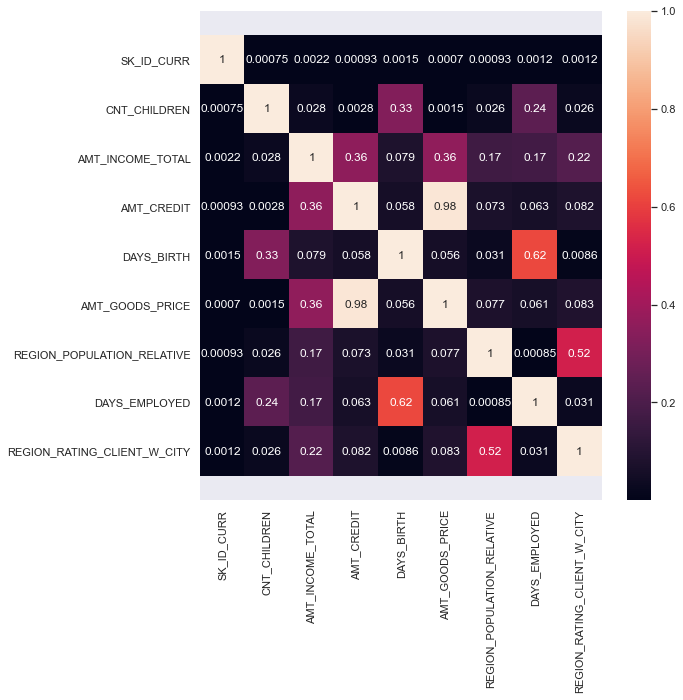

In [93]:
f, ax = plt.subplots(figsize=(9, 9))
ax = sns.heatmap(cor_0, annot =True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [97]:
# writing  the order of variables from highest to lowest correlation value for data_0
cor_0 = cor_0.abs()
t0 = (cor_0.where(np.triu(np.ones(cor_0.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
t0.head(10)

AMT_CREDIT                  AMT_GOODS_PRICE                0.984661
DAYS_BIRTH                  DAYS_EMPLOYED                  0.620285
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    0.517448
AMT_INCOME_TOTAL            AMT_GOODS_PRICE                0.362433
                            AMT_CREDIT                     0.359335
CNT_CHILDREN                DAYS_BIRTH                     0.332325
                            DAYS_EMPLOYED                  0.241973
AMT_INCOME_TOTAL            REGION_RATING_CLIENT_W_CITY    0.221222
                            DAYS_EMPLOYED                  0.174764
                            REGION_POPULATION_RELATIVE     0.168309
dtype: float64

In [60]:
#Corelation for numerical columns with Target=1
cor_1=df[numeric_cols].corr()
cor_1

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_BIRTH,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,REGION_RATING_CLIENT_W_CITY
SK_ID_CURR,1.000000,-0.000746,0.002246,-0.000930,-0.001485,-0.000697,0.000933,0.001201,-0.001218
CNT_CHILDREN,-0.000746,1.000000,0.028083,0.002816,0.332325,-0.001486,-0.026243,-0.241973,0.025533
AMT_INCOME_TOTAL,0.002246,0.028083,1.000000,0.359335,0.079299,0.362433,0.168309,-0.174764,-0.221222
AMT_CREDIT,-0.000930,0.002816,0.359335,1.000000,-0.057847,0.984661,0.072761,-0.063071,-0.082284
DAYS_BIRTH,-0.001485,0.332325,0.079299,-0.057847,1.000000,-0.056247,-0.030597,-0.620285,0.008562
AMT_GOODS_PRICE,-0.000697,-0.001486,0.362433,0.984661,-0.056247,1.000000,0.076712,-0.060924,-0.083216
REGION_POPULATION_RELATIVE,0.000933,-0.026243,0.168309,0.072761,-0.030597,0.076712,1.000000,-0.000851,-0.517448
DAYS_EMPLOYED,0.001201,-0.241973,-0.174764,-0.063071,-0.620285,-0.060924,-0.000851,1.000000,0.031400
REGION_RATING_CLIENT_W_CITY,-0.001218,0.025533,-0.221222,-0.082284,0.008562,-0.083216,-0.517448,0.031400,1.000000


(9.5, -0.5)

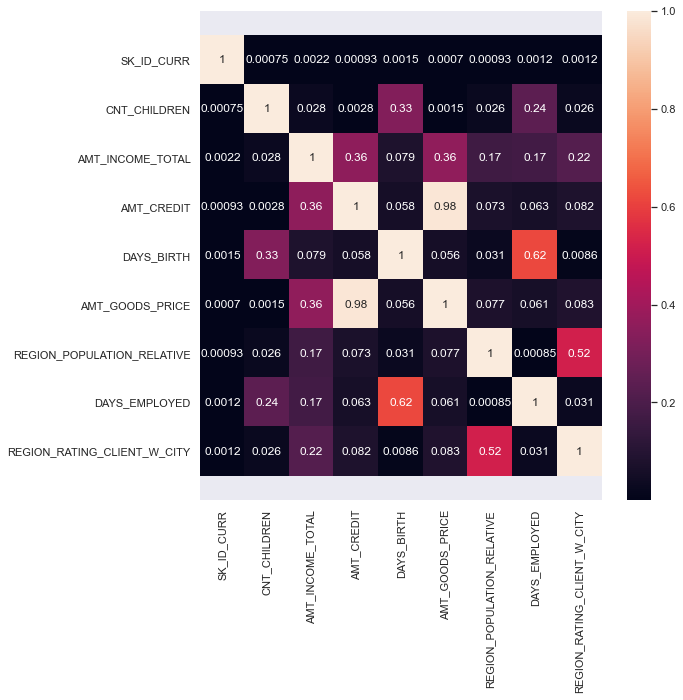

In [94]:
f, ax = plt.subplots(figsize=(9,9))
ax = sns.heatmap(cor_1, annot =True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [96]:
# writing  the order of variables from highest to lowest correlation value for data_0
cor_1 = cor_1.abs()
t1 = (cor_1.where(np.triu(np.ones(cor_0.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
t1.head(10)

AMT_CREDIT                  AMT_GOODS_PRICE                0.984661
DAYS_BIRTH                  DAYS_EMPLOYED                  0.620285
REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT_W_CITY    0.517448
AMT_INCOME_TOTAL            AMT_GOODS_PRICE                0.362433
                            AMT_CREDIT                     0.359335
CNT_CHILDREN                DAYS_BIRTH                     0.332325
                            DAYS_EMPLOYED                  0.241973
AMT_INCOME_TOTAL            REGION_RATING_CLIENT_W_CITY    0.221222
                            DAYS_EMPLOYED                  0.174764
                            REGION_POPULATION_RELATIVE     0.168309
dtype: float64

### PREVIOUS APP DATASET

In [64]:
#Reading the files previous_application.csv
app2=pd.read_csv('C:/Users/dhavalpc/Downloads/previous_application.csv')
app2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
app2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [66]:
app2.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [67]:
# null count for previous application data
app2.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [68]:
#Finding null percent

null_percent_2= round(100*(app2.isnull().sum()/len(app2.index)),2)
null_percent_2

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

As we see there are few rows with around 40% null values like DAYS_FIRST_DUE, DAYS_LAST_DUE however they might be useful for our analysis hence we won't be droppingthem.

We can drop there are 2 columns with around 99% null values which can be dropped.



In [69]:
#Dropping some of the irrelevant columns as per understanding
drop_col2 = ['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NFLAG_INSURED_ON_APPROVAL','RATE_DOWN_PAYMENT']
app2.drop(columns=drop_col2,axis=1,inplace=True)

In [70]:
app2.shape

(1670214, 33)

In [71]:
#Checking for outliers and handling null values

app2.AMT_DOWN_PAYMENT.isnull().sum()

895844

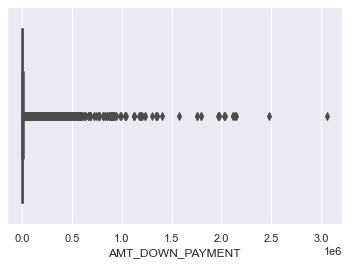

In [72]:
# plotting boxplot to understand the outliers
sns.boxplot(app2['AMT_DOWN_PAYMENT'])
plt.show()

We can see there are outliers present.Also the null percent is more than 50% which means that most of the customers have not taken the down payment.
Hence we can impute all those values to 0.

In [73]:
app2.CNT_PAYMENT.isnull().sum()

372230

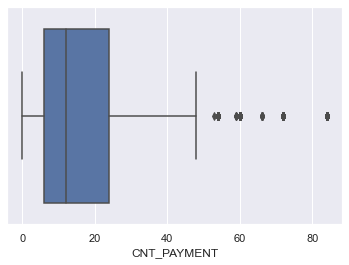

In [74]:
sns.boxplot(app2['CNT_PAYMENT'])

We see outliers over here hence we can impute median values

In [75]:
#Checking datatypes

app2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  NAME_CASH_LOAN_PURPOSE       1670214 non-n

In [76]:
app2.loc[:,'NFLAG_LAST_APPL_IN_DAY']=app2.loc[:,'NFLAG_LAST_APPL_IN_DAY'].astype(object)

#Convert the following into absolute values as days cant be negative

app2['DAYS_DECISION']= abs(app2['DAYS_DECISION'])   
app2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [77]:
# similaryly converting other days variables into absolute values 
app2['DAYS_FIRST_DRAWING']= abs(app2['DAYS_FIRST_DRAWING'])
app2['DAYS_FIRST_DUE']= abs(app2['DAYS_FIRST_DUE'])
app2['DAYS_LAST_DUE']= abs(app2['DAYS_LAST_DUE'])
app2['DAYS_LAST_DUE_1ST_VERSION']= abs(app2['DAYS_LAST_DUE_1ST_VERSION'])
app2['DAYS_TERMINATION']= abs(app2['DAYS_TERMINATION'])
app2.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN


In [78]:
app2['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

We can see that the count of XNA and XAP is high.We can impute them by 'UNSPECIFIED'

In [79]:
#filling the nan values
app2.loc[app2['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE']='UNSPECIFIED'
app2.loc[app2['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE']='UNSPECIFIED'
app2['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize = True)

UNSPECIFIED                         0.958308
Repairs                             0.014229
Other                               0.009345
Urgent needs                        0.005036
Buying a used car                   0.001729
Building a house or an annex        0.001612
Everyday expenses                   0.001447
Medicine                            0.001302
Payments on other loans             0.001156
Education                           0.000942
Journey                             0.000742
Purchase of electronic equipment    0.000635
Buying a new car                    0.000606
Wedding / gift / holiday            0.000576
Buying a home                       0.000518
Car repairs                         0.000477
Furniture                           0.000448
Buying a holiday home / land        0.000319
Business development                0.000255
Gasification / water supply         0.000180
Buying a garage                     0.000081
Hobby                               0.000033
Money for 

In [80]:
round(app2['NAME_GOODS_CATEGORY'].value_counts(normalize = True),2)*100

XNA                         57.0
Mobile                      13.0
Consumer Electronics         7.0
Computers                    6.0
Audio/Video                  6.0
Furniture                    3.0
Photo / Cinema Equipment     1.0
Construction Materials       1.0
Clothing and Accessories     1.0
Auto Accessories             0.0
Jewelry                      0.0
Homewares                    0.0
Medical Supplies             0.0
Vehicles                     0.0
Sport and Leisure            0.0
Gardening                    0.0
Other                        0.0
Office Appliances            0.0
Tourism                      0.0
Medicine                     0.0
Direct Sales                 0.0
Fitness                      0.0
Additional Service           0.0
Education                    0.0
Weapon                       0.0
Insurance                    0.0
House Construction           0.0
Animals                      0.0
Name: NAME_GOODS_CATEGORY, dtype: float64

In [81]:
app2.loc[app2['NAME_GOODS_CATEGORY']=='XNA','NAME_GOODS_CATEGORY']='UNSPECIFIED'
round(app2['NAME_GOODS_CATEGORY'].value_counts(normalize = True),2)*100

UNSPECIFIED                 57.0
Mobile                      13.0
Consumer Electronics         7.0
Computers                    6.0
Audio/Video                  6.0
Furniture                    3.0
Photo / Cinema Equipment     1.0
Construction Materials       1.0
Clothing and Accessories     1.0
Auto Accessories             0.0
Jewelry                      0.0
Homewares                    0.0
Medical Supplies             0.0
Vehicles                     0.0
Sport and Leisure            0.0
Gardening                    0.0
Other                        0.0
Office Appliances            0.0
Tourism                      0.0
Medicine                     0.0
Direct Sales                 0.0
Fitness                      0.0
Additional Service           0.0
Education                    0.0
Weapon                       0.0
Insurance                    0.0
House Construction           0.0
Animals                      0.0
Name: NAME_GOODS_CATEGORY, dtype: float64

## MERGING DATASETS

In [82]:
# Merging both datasets
merge_app =pd.merge(df,app2,how='inner',on='SK_ID_CURR',suffixes='_1')

In [83]:
merge_app.shape

(1376130, 52)

In [84]:
merge_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376130 entries, 0 to 1376129
Data columns (total 52 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1376130 non-null  int64  
 1   CNT_CHILDREN                 1376130 non-null  int64  
 2   TARGET                       1376130 non-null  int64  
 3   NAME_CONTRACT_TYPE_          1376130 non-null  object 
 4   CODE_GENDER                  1376130 non-null  object 
 5   FLAG_OWN_CAR                 1376130 non-null  object 
 6   FLAG_OWN_REALTY              1376130 non-null  object 
 7   AMT_INCOME_TOTAL             1376130 non-null  float64
 8   AMT_CREDIT_                  1376130 non-null  float64
 9   NAME_INCOME_TYPE             1376130 non-null  object 
 10  NAME_EDUCATION_TYPE          1376130 non-null  object 
 11  NAME_FAMILY_STATUS           1376130 non-null  object 
 12  NAME_HOUSING_TYPE            1376130 non-n

In [85]:
merge_app.rename(columns={'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE',
                                'AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START1' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START1':'HOUR_APPR_PROCESS_START',
                                'NAME_CONTRACT_TYPE1':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT1':'AMT_CREDIT_PREV','AMT_ANNUITY1':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_START1':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START1':'HOUR_APPR_PROCESS_START_PREV'},inplace=True)

### UNIVARIATE ANALYSIS

In [86]:
merge_app['NAME_CONTRACT_STATUS'].value_counts(normalize=True)

Approved        0.626476
Canceled        0.183619
Refused         0.173766
Unused offer    0.016139
Name: NAME_CONTRACT_STATUS, dtype: float64

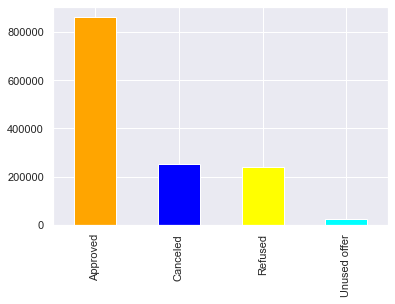

In [87]:
# bar plot to visualize the frequency
merge_app['NAME_CONTRACT_STATUS'].value_counts().plot.bar(color=['orange', 'blue', 'yellow', 'cyan'])

Here we see that loan has been appoved for around 62% people and very less % of people have unused offer.

In [88]:
app2['CNT_PAYMENT'].value_counts(normalize=True)

12.0    2.488852e-01
6.0     1.467360e-01
0.0     1.117001e-01
10.0    1.092856e-01
24.0    1.061369e-01
18.0    5.965405e-02
36.0    5.591980e-02
60.0    4.129481e-02
48.0    3.645345e-02
8.0     2.338164e-02
4.0     2.074294e-02
30.0    1.303868e-02
14.0    6.358322e-03
42.0    5.497757e-03
16.0    4.399130e-03
5.0     3.048574e-03
54.0    1.620975e-03
20.0    1.390618e-03
7.0     1.104790e-03
9.0     9.522459e-04
3.0     8.474681e-04
15.0    6.964647e-04
11.0    5.154147e-04
72.0    1.070891e-04
13.0    3.929170e-05
17.0    3.698043e-05
84.0    3.466915e-05
22.0    2.850574e-05
23.0    2.080149e-05
26.0    1.001553e-05
35.0    8.474681e-06
66.0    7.704255e-06
29.0    6.163404e-06
28.0    6.163404e-06
32.0    4.622553e-06
19.0    4.622553e-06
34.0    3.081702e-06
59.0    3.081702e-06
45.0    2.311277e-06
41.0    2.311277e-06
47.0    2.311277e-06
21.0    2.311277e-06
44.0    1.540851e-06
39.0    1.540851e-06
38.0    1.540851e-06
46.0    1.540851e-06
40.0    7.704255e-07
33.0    7.704

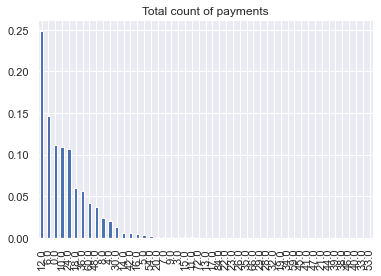

In [89]:
app2['CNT_PAYMENT'].value_counts(normalize=True).plot.bar(title='Total count of payments')
plt.show()

We can see that most of them have 1 year loans

## BIVARIATE ANALYSIS

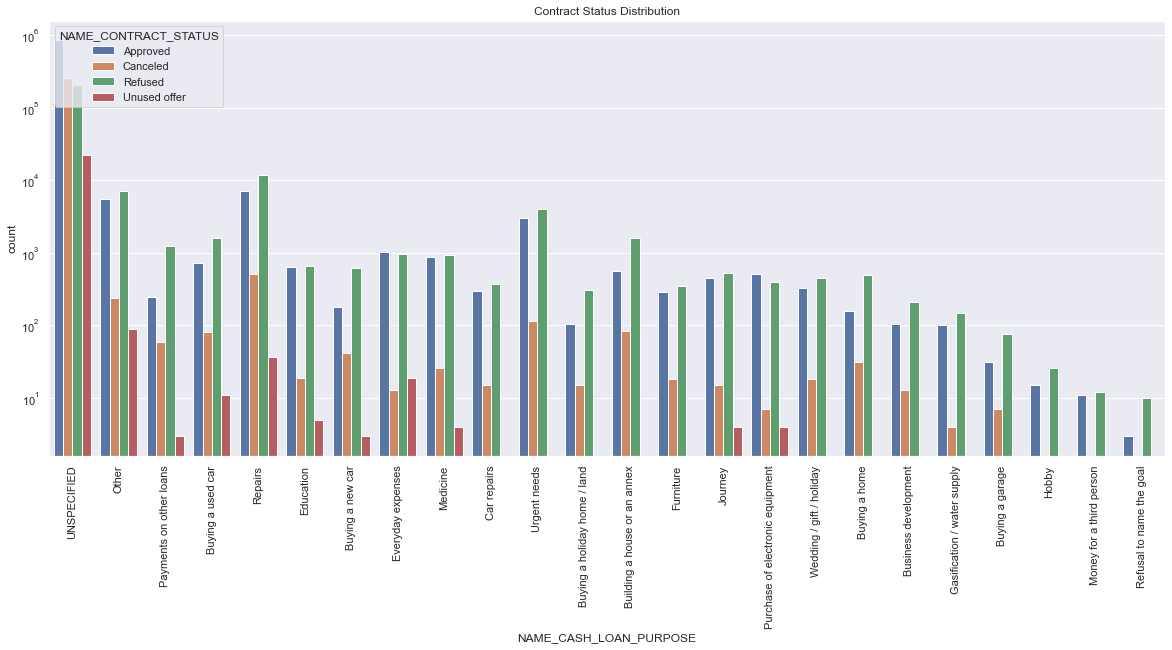

In [90]:
# Contract Status across the Population
plt.figure(figsize = (20,8))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', hue='NAME_CONTRACT_STATUS', data = merge_app)
plt.title('Contract Status Distribution')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()

Here we see that the UNSPECIFIED column has more rejections.We also see that rejection is more than loan approval in cases of people buying a car and payyments on other loans.

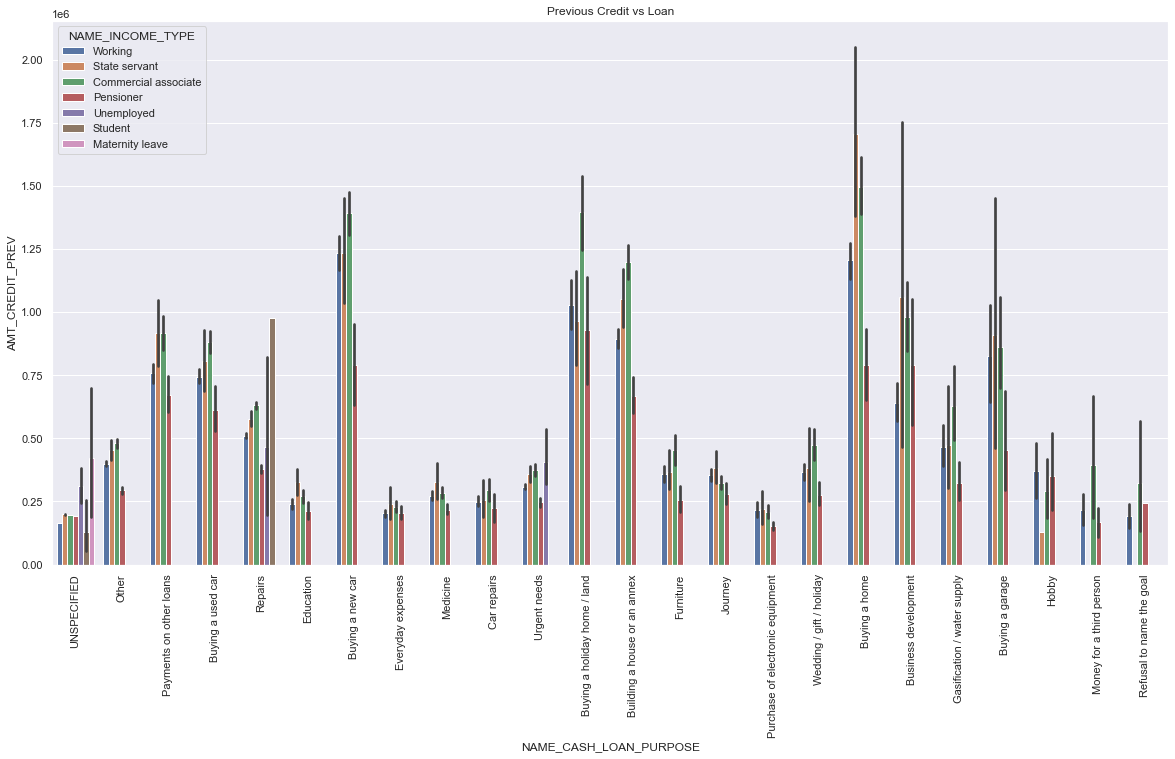

In [91]:
plt.figure(figsize = (20,10))
sns.barplot(x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_PREV', hue = 'NAME_INCOME_TYPE' , data = merge_app)
plt.title('Previous Credit vs Loan')
plt.xticks(rotation = 90)
plt.show()

We can see that people who wish to buy a new car, buying to holiday home/land, building a house ,buying a home 
have a large credit amount as compared to other variables.

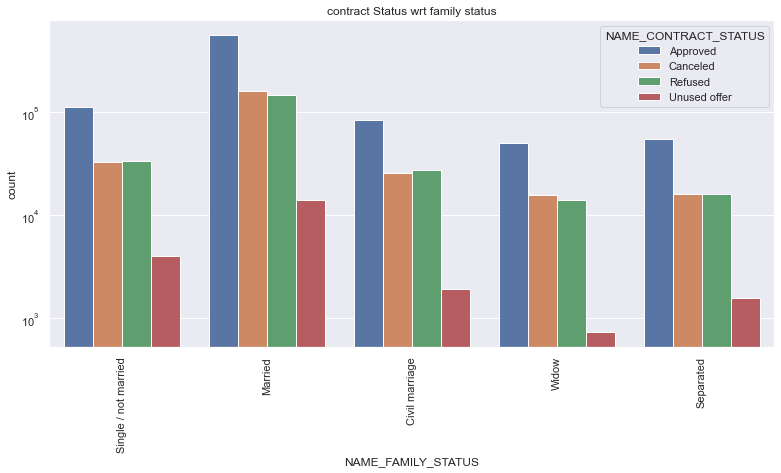

In [92]:

plt.figure(figsize = (13,6))
sns.countplot(x='NAME_FAMILY_STATUS', hue='NAME_CONTRACT_STATUS', data = merge_app)
plt.title('contract Status wrt family status')
plt.yscale('log')
plt.xticks(rotation = 90)
plt.show()


Married couple tend to have a higher loan approval as compared to other groups

### SUMMARY

We conclude that the following columns are crucial for making the decision for loan approval


1. OCCUPATION_TYPE
2. AMT_INCOME
3. AMT_CREDIT
4. NAME_FAMILY_STATUS
5. NAME_CASH_LOAN_PURPOSE
6. CODE_GENDER